In [10]:
import pandas as pd
data_set = pd.read_csv('employee.csv', encoding='ISO-8859-1')
# travailler sur une copie pour faire des comparaisons
df = data_set.copy()


In [11]:
import numpy as np
# Calcule le nombre de valeurs manquantes selon chaque feature
# fonction old-school, existe certainement une fonction chez pandas...
def compute_missing_values(df):
    list_missing_val = {}
    col = df.columns
    for i, k in enumerate(col):
        list_missing_val[k] = df[k].isna().sum()
    return list_missing_val

In [12]:
print(df.shape)
list = compute_missing_values(data_set)
print("missing values")
for i in list:
    print(f"{i}-->{list[i]:d}")

(22552, 12)
missing values
NAME-->6
DEPARTMENT_NAME-->6
TITLE-->6
REGULAR-->644
RETRO-->22150
OTHER-->8423
OVERTIME-->15706
INJURED-->21096
DETAIL-->20493
QUINN_EDUCATION_INCENTIVE-->21166
TOTAL_GROSS-->6
POSTAL-->6


In [13]:

# compte le nombre de tuples vides (toutes les features à nan)
# df[df.isna().all(axis=1)].shape[0]

# suppression des tuples vides (toutes les colonnes à NaN)
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22546 entries, 0 to 22545
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22546 non-null  object
 1   DEPARTMENT_NAME            22546 non-null  object
 2   TITLE                      22546 non-null  object
 3   REGULAR                    21908 non-null  object
 4   RETRO                      402 non-null    object
 5   OTHER                      14129 non-null  object
 6   OVERTIME                   6846 non-null   object
 7   INJURED                    1456 non-null   object
 8   DETAIL                     2059 non-null   object
 9   QUINN_EDUCATION_INCENTIVE  1386 non-null   object
 10  TOTAL_GROSS                22546 non-null  object
 11  POSTAL                     22546 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


In [14]:
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 
       'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS', 'POSTAL']
# on remplace les , ' ou tout les trucs qui perturbent la convertion en float python.
df[col] = df[col].replace({',': '', "'": ''}, regex=True)
# on applique la converton en float
df[col] = df[col].apply(pd.to_numeric, errors='coerce')

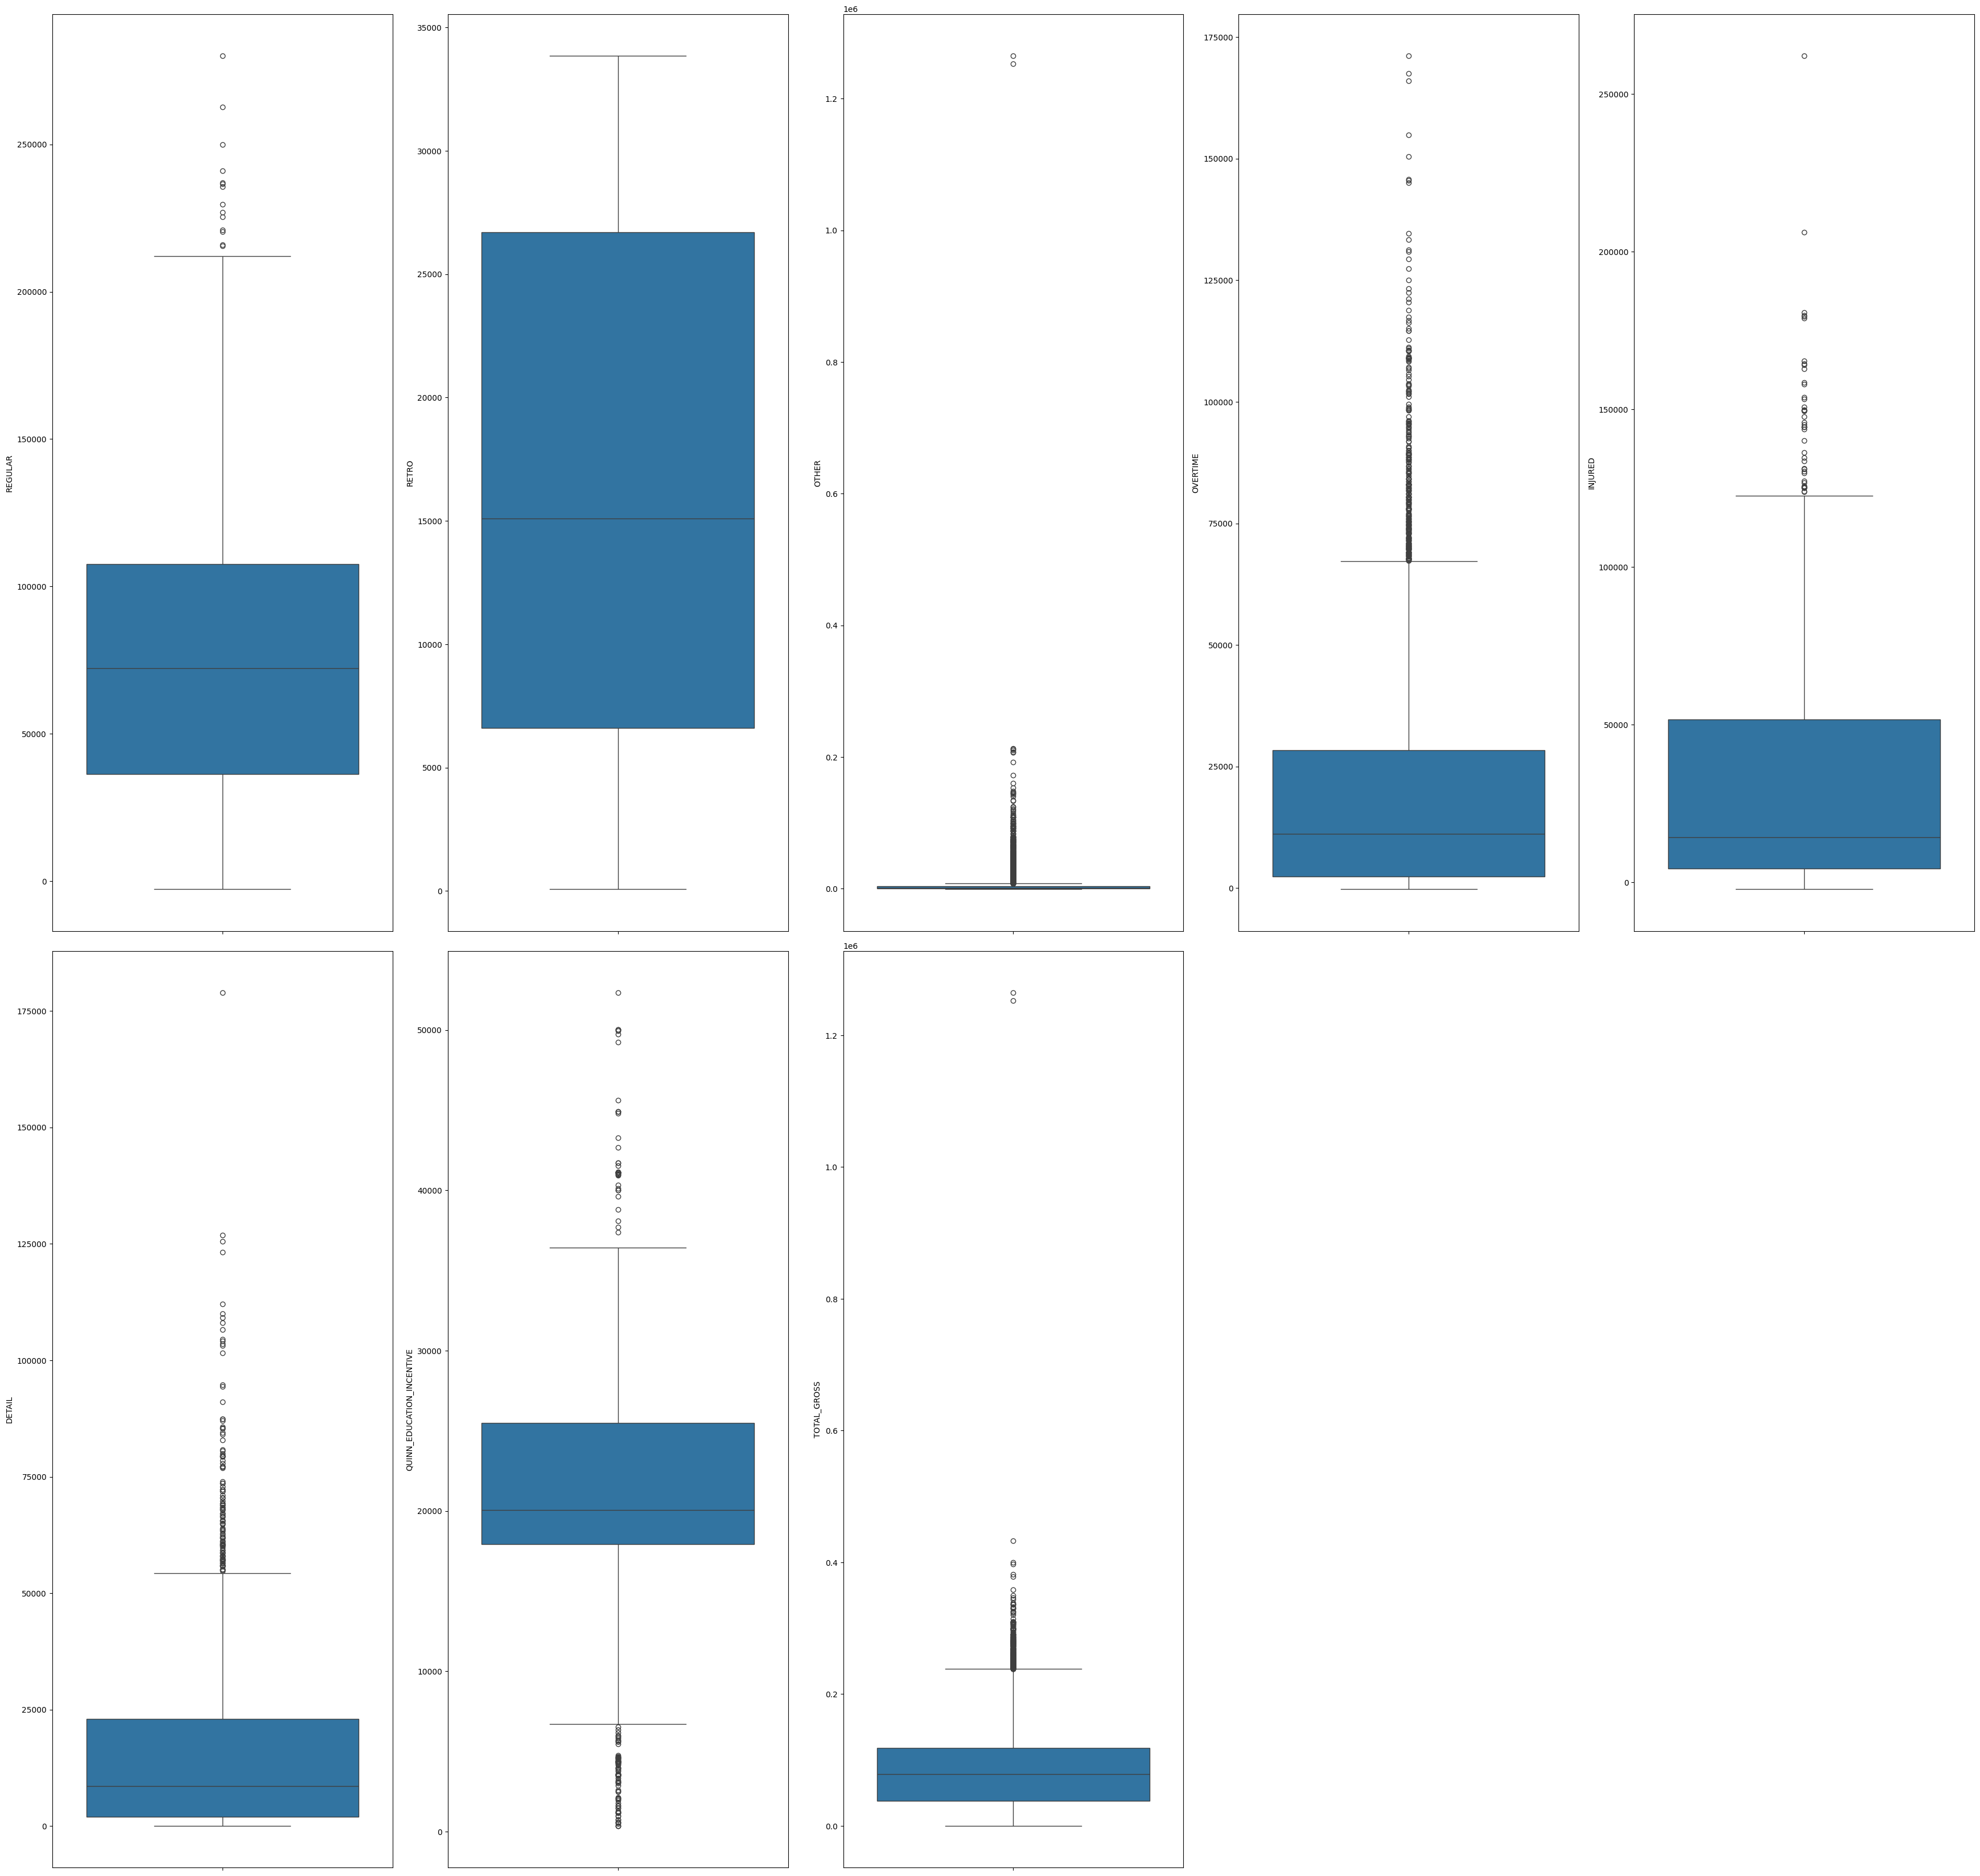

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# on afficher les boxplots des features numériques pour observer à quoi cela ressemble
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']

fig, axs = plt.subplots(2, 5, figsize=(35, 35))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.boxplot(y=df[col], data=df, ax=axs[i])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.show()

In [16]:
# Nous séléctionnons les tuples comprenant les 5 valeurs max sur le total_gross
# nous avons 2 tuples que nous supprimons.
top = df.nlargest(n=2, columns=['TOTAL_GROSS']).index
# Supprimer les lignes correspondant aux index obtenus
df = df.drop(top)

In [30]:
col = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION_INCENTIVE', 'TOTAL_GROSS']
df = df[col]

,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS
2,69772.10,NaN,212739.48,82300.87,30939.24,12144.0,25178.06,433073.75
3,100963.38,NaN,211900.28,67849.66,NaN,9016.0,10096.55,399825.87
4,109858.02,NaN,192097.54,75938.65,NaN,19550.0,NaN,397444.21
5,127626.76,NaN,124524.50,66433.83,NaN,50085.0,12762.78,381432.87
6,142466.41,NaN,15820.50,167509.61,NaN,24695.0,28198.49,378690.01
...,...,...,...,...,...,...,...,...
22541,NaN,69.86,NaN,NaN,NaN,NaN,NaN,69.86
22542,NaN,NaN,NaN,59.78,NaN,NaN,NaN,59.78
22543,NaN,NaN,56.62,NaN,NaN,NaN,NaN,56.62
22544,54.00,NaN,NaN,NaN,NaN,NaN,NaN,54.00


In [26]:
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd










ImportError: IterativeImputer is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:
from sklearn.experimental import enable_iterative_imputer

# Rapport

## Q2:
- La commande count() nous permet de connaître le nombre de tuple pour chaque feature. Nous avons 22546 enregistrements et 12
  colonnes (features).
- La fonction codée plus haut nous permet de connaître le nombre de valeurs manquantes. En voici la sortie:
  missing values
NAME-->6
DEPARTMENT_NAME-->6
TITLE-->6
REGULAR-->644
RETRO-->22150
OTHER-->8423
OVERTIME-->15706
INJURED-->21096
DETAIL-->20493
QUINN_EDUCATION_INCENTIVE-->21166
TOTA
POSTAL-->6
L_GROSS-->6
- Oui il y 6 tuples dont toutes les colonness
POSTAL-->6





